In [ ]:
#|default_exp app

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

ModuleNotFoundError: No module named 'gradio'

In [2]:
!pip install -Uq fastbook fastai 

In [3]:
!ls /kaggle/input

godzilla-or-kingkong


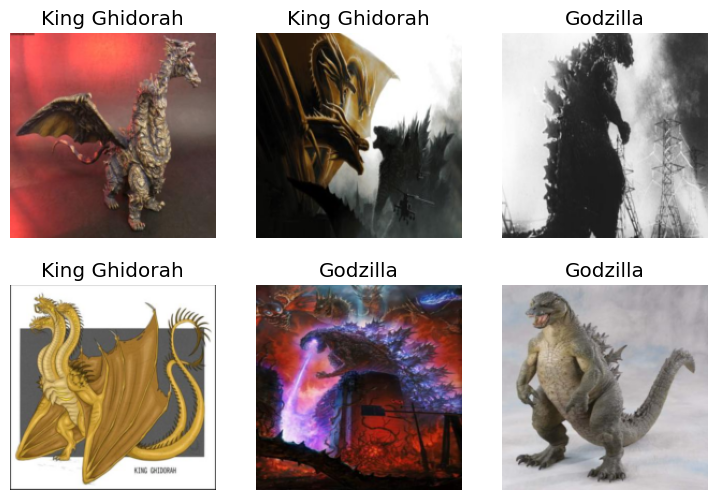

In [6]:
from fastai import *
from fastbook import *
path = '/kaggle/input/godzilla-or-kingkong'
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

In [9]:
learn.export('model.pkl')

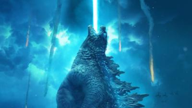

In [12]:
im = PILImage.create('/kaggle/input/godzilla-or-kingkong/Godzilla/Godzilla (1).jpeg')
im.thumbnail((192,192))
im

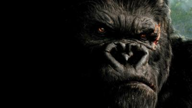

In [16]:
im2 = PILImage.create('/kaggle/input/godzilla-or-kingkong/KingKong/KingKong (10).jpg')
im2.thumbnail((192,192))
im2

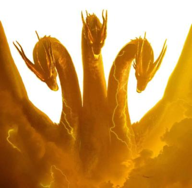

In [10]:
im3 = PILImage.create('/kaggle/input/godzilla-or-kingkong/King Ghidorah/King_Ghidorah (104).jpg')
im3.thumbnail((192,192))
im3

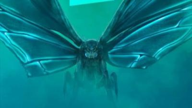

In [12]:
im4 = PILImage.create('/kaggle/input/godzilla-or-kingkong/Mothra/Mothra (106).jpg')
im4.thumbnail((192,192))
im4

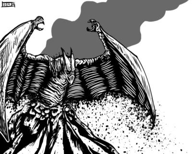

In [14]:
im5 = PILImage.create('/kaggle/input/godzilla-or-kingkong/Rodan/Rodan (101).jpg')
im5.thumbnail((192,192))
im5

In [ ]:
#|export
learn = load_learner('model.pkl')

In [13]:
learn.predict(im)

('Godzilla', tensor(0), tensor([9.9902e-01, 9.8120e-04]))

In [17]:
learn.predict(im2)

('KingKong', tensor(1), tensor([0.0048, 0.9952]))

In [11]:
learn.predict(im3)

('King Ghidorah',
 tensor(1),
 tensor([1.7079e-06, 1.0000e+00, 1.9125e-07, 4.4342e-07, 1.6663e-06]))

In [13]:
learn.predict(im4)

('Mothra',
 tensor(3),
 tensor([6.9912e-06, 4.9477e-02, 6.4517e-05, 9.5038e-01, 7.4921e-05]))

In [15]:
learn.predict(im5)

('Rodan',
 tensor(4),
 tensor([1.2272e-05, 1.9528e-03, 5.3031e-05, 1.7497e-04, 9.9781e-01]))

In [18]:
#|export
categories = ['Godzilla', 'King Kong']
def classify_kaiju(img):
    pred,idx,probs=learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [19]:
classify_kaiju(im2)

{'Godzilla': 0.004830744117498398, 'King Kong': 0.9951692223548889}

In [20]:
#|export
image = gr.Image()
label = gr.Label()
examples = ['Godzilla_1.jpg', 'Godzilla_2.jpg', 'KingKong_1.jpg', 'KingKong_2.jpg', 'Mothra_1.jpg', 'Mothra_2.jpg', 'King Ghidorah_1.jpg', 'King Ghidorah_2.jpg', 'Rodan_1.jpg', 'Rodan_2.jpg', ]

intf = gr.Interface(fn=classify_kaiju, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

NameError: name 'gr' is not defined

In [3]:
import nbdev
import nbdev.export
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successfully!')

Export successfully!
